In [ ]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
68329,1479499316028233177.jpg,114,141,133,156,1
18294,1478732179876744646.jpg,184,191,94,107,5
71414,1479499683555846377.jpg,214,221,143,148,1
26377,1478732694290500683.jpg,204,226,140,155,1
44072,1478897390539462679.jpg,248,262,143,176,1


In [ ]:
classes = df.class_id.unique()
print(classes)

[1 5 2 3 4]


In [ ]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [ ]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = 'IMAGES/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

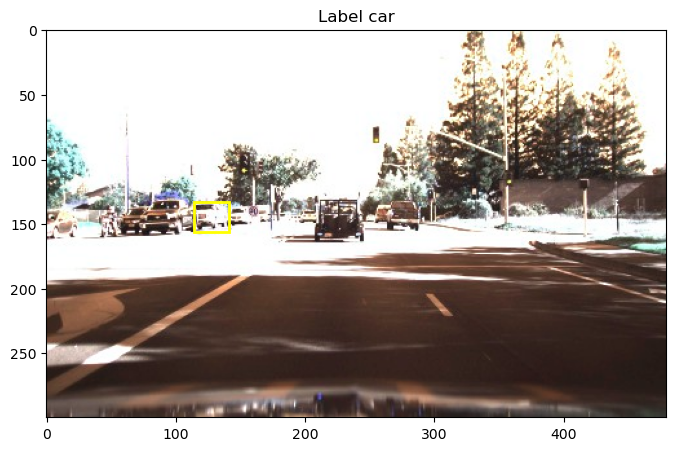

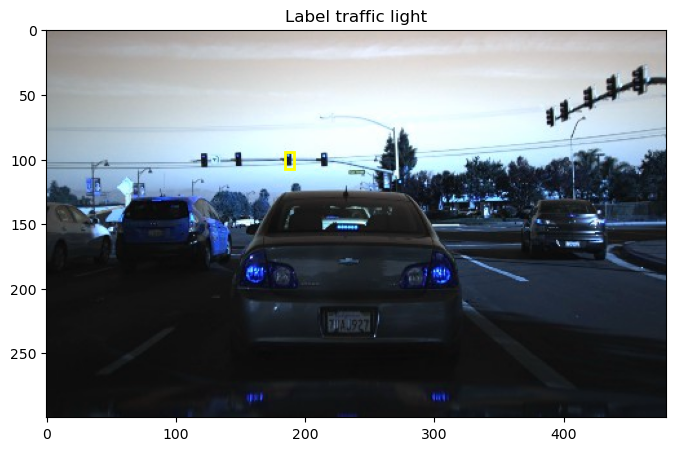

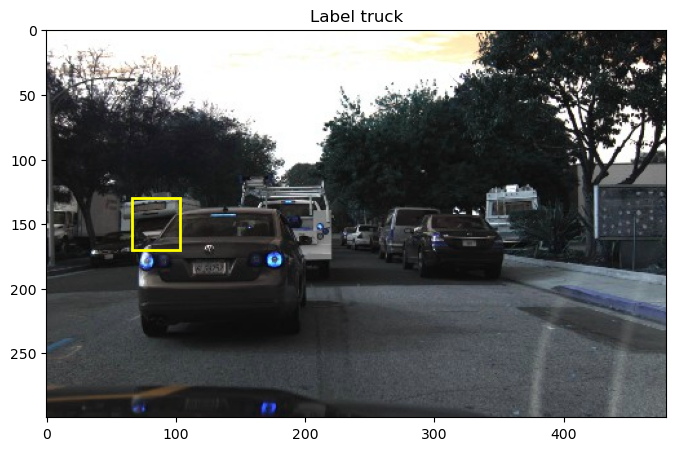

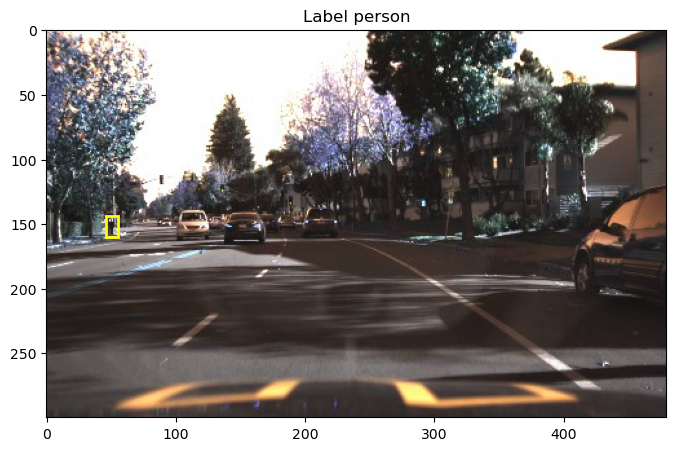

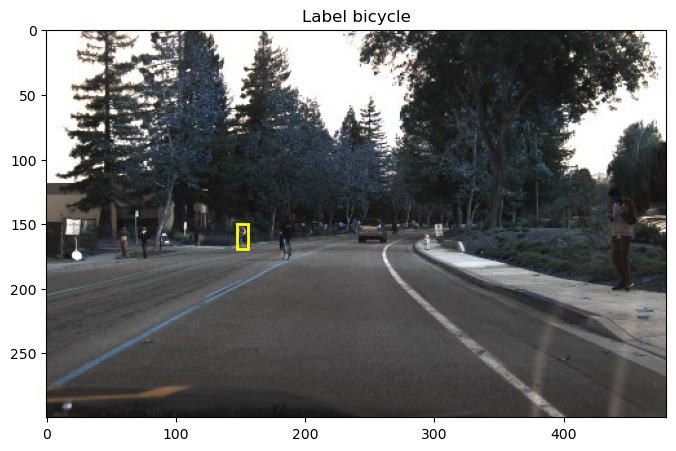

In [ ]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

    plt.show()

In [ ]:
!pip install ultralytics

   ---------------------------------------- 0.0/882.5 kB ? eta -:--:--
   - -------------------------------------- 41.0/882.5 kB 1.9 MB/s eta 0:00:01
   -- ------------------------------------ 61.4/882.5 kB 648.1 kB/s eta 0:00:02
   ------- -------------------------------- 163.8/882.5 kB 1.4 MB/s eta 0:00:01
   ---------- ----------------------------- 225.3/882.5 kB 1.4 MB/s eta 0:00:01
   ---------- ----------------------------- 225.3/882.5 kB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 430.1/882.5 kB 1.6 MB/s eta 0:00:01
   ------------------- -------------------- 430.1/882.5 kB 1.6 MB/s eta 0:00:01
   ------------------------- -------------- 563.2/882.5 kB 1.5 MB/s eta 0:00:01
   -------------------------- ------------- 593.9/882.5 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 757.8/882.5 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 849.9/882.5 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 882.5/

In [ ]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Administrator\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8m.pt")

100%|█████████████████████████████████████████████████████████████████████████████| 49.7M/49.7M [00:19<00:00, 2.64MB/s]


In [ ]:
results=model.predict(source="IMAGES/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 D:\IMAGES\1478019956680248165.jpg: 416x640 1 car, 1 truck, 260.1ms
Speed: 3.0ms preprocess, 260.1ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


In [ ]:
result = results[0]
box = result.boxes[0]

In [ ]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [ ]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.68826293945312, 148.7809295654297, 162.10047912597656]
Probability: 0.7161701321601868


In [ ]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [ ]:
results1 = model.predict(source="/IMAGES/1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 D:\IMAGES\1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 250.2ms
Speed: 2.0ms preprocess, 250.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict


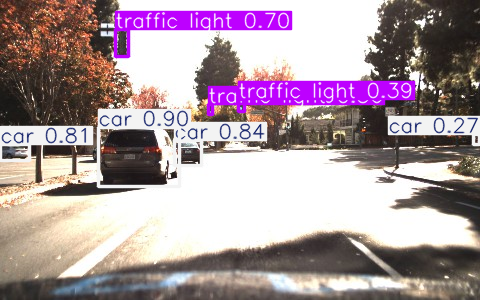

In [ ]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO('yolov8m.pt')

In [ ]:
root_path = 'IMAGES/*'
num_samples = 4
images_data = glob(root_path)
random_image = random.sample(images_data, num_samples)

plt.figure(figsize=(10,6))
for i in range(num_samples):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')

In [ ]:
# Create a list to store the images
images = []
for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        #print(f'In this image {len(box)} objects has been detected.')
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])

In [ ]:
# plotting the images after object detection
print('\n\n-------------------------------------- Images after object detection with YOLOV8 --------------------------------')

plt.figure(figsize=(10,6))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()